In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model

2025-06-04 10:19:09.819457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749032350.038584      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749032350.111673      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Paths
train_path = "/kaggle/input/dogs-vs-cats/dataset/train"
val_path = "/kaggle/input/dogs-vs-cats/dataset/validation"
test_path = "/kaggle/input/dogs-vs-cats/dataset/test"

In [3]:
# Image Preprocessing
img_gen = ImageDataGenerator(rescale=1./255)

In [4]:
train = img_gen.flow_from_directory(train_path, target_size=(150,150), class_mode='binary')
val = img_gen.flow_from_directory(val_path, target_size=(150,150), class_mode='binary')
test = img_gen.flow_from_directory(test_path, target_size=(150,150), class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 12461 images belonging to 2 classes.


In [5]:
# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-04 10:23:12.038656: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train
history = model.fit(train, epochs=10, validation_data=val)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 483s 768ms/step - accuracy: 0.6252 - loss: 0.6499 - val_accuracy: 0.7398 - val_loss: 0.5258
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 467s 748ms/step - accuracy: 0.7827 - loss: 0.4631 - val_accuracy: 0.7758 - val_loss: 0.4978
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 465s 744ms/step - accuracy: 0.8347 - loss: 0.3680 - val_accuracy: 0.7958 - val_loss: 0.4441
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 471s 754ms/step - accuracy: 0.8888 - loss: 0.2686 - val_accuracy: 0.7962 - val_loss: 0.4875
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 474s 758ms/step - accuracy: 0.9301 - loss: 0.1816 - val_accuracy: 0.7850 - val_loss: 0.5838
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 490s 739ms/step - accuracy: 0.9570 - loss: 0.1186 - val_accuracy: 0.7930 - val_loss: 0.6557
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 462s 739ms/step - accuracy: 0.9708 - loss: 0.0823 - val_accuracy: 0.7888 - val_loss: 0.8437
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 466s 745ms/step - accuracy: 0.9795 -

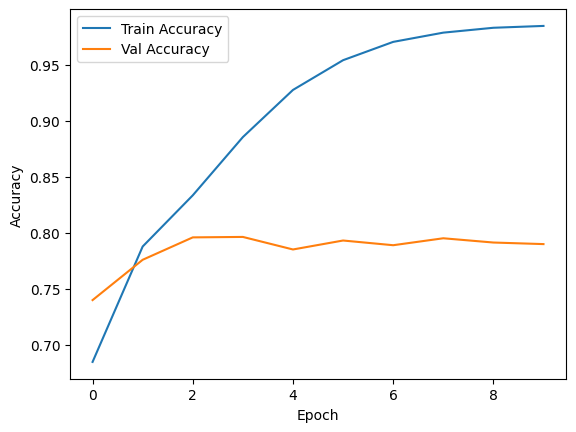

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/kaggle/input/dogs-vs-cats/dataset/test/dogs/dog (100).jpg'  # Replace with the path to your image

# Load and resize the image to match model input
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values


In [34]:
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("🐶 It's a Dog!")
else:
    print("🐱 It's a Cat!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
🐶 It's a Dog!


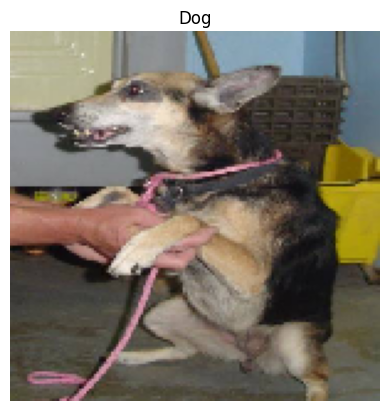

In [35]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title("Dog" if prediction[0][0] > 0.5 else "Cat")
plt.axis('off')
plt.show()
